In [16]:
import os
import h5py
import re
from scipy.fft import ifft2, fftshift
import numpy as np
import matplotlib.pyplot as plt

In [7]:
# set the input dataset path, output groundtruth data path, downsample_4x,downsample_8x
dataset_path = "/Users/xiaoqingliu/Documents/COSC6364_ANA/Project/singlecoil_val"
ground_truth = "/Users/xiaoqingliu/Documents/COSC6364_ANA/Project/singlecoil_groundtruth"
downsample_4x = "/Users/xiaoqingliu/Documents/COSC6364_ANA/Project/singlecoil_4xdownsample"
downsample_8x = "/Users/xiaoqingliu/Documents/COSC6364_ANA/Project/singlecoil_8xdownsample"

In [8]:
# check the file is h5 or not
def is_h5(file_name):
    f = file_name.lower()
    return f.endswith(".h5") 


In [12]:
# walk through the dataset get the gray images
def get_h5_files_path(dataset_path):
    """
    This function is to get the file path in the dataset
    Input:
        dataset_path: original h5 dataset fold path
    Output:
        h5_filenames: h5 file path in the dataset fold
    """
    h5_filenames = []
    for path in os.listdir(dataset_path):
        if is_h5(path):
            h5_filenames += [os.path.join(dataset_path, path)]
    return h5_filenames

h5_filenames = get_h5_files_name(dataset_path)
print(len(h5_filenames))
print(h5_filenames[0])

199
/Users/xiaoqingliu/Documents/COSC6364_ANA/Project/singlecoil_val/file1002377.h5


In [84]:
# Create 4-fold uniform mask
def generate_mask(width, height):
    mask = np.zeros((height, width), dtype=np.uint8)
    middle = round(width / 2)
    gsp_middle = round(width / 12)
    step_uniform = 2
    step_black = 9
    left_start = step_black
    left_end = middle - round(gsp_middle/2) - step_black
    right_start = middle + round(gsp_middle/2) + step_black
    right_end = width - step_uniform
    
    left = np.arange(left_start,left_end,step_uniform + step_black)
    for i in left:
        mask[:, i:i+step_uniform] = 1

    right = np.arange(right_start, right_end, step_uniform + step_black)
    for i in right:
        mask[:, i:i+step_uniform] = 1

    mask[:, left_end+step_black : right_start - step_black] = 1
    
    return mask

In [115]:
def preparing_image_pairs(h5_filenames, ground_truth, downsample_4x):
    """
    This function is to get and save ground truth images, 4x downsampled images to ground truth fold 
    and downsample_4x fold
    Input:
        h5_filenames: h5 files in the original dataset
        ground_truth: the path of the fold for saving ground truth images
        downsample_4x: the path of the fold for saving downsample_4x images
    Output:
        None
    """
    # Get the groud truth, 4x sample images from h5 file
    for i, file in enumerate(h5_filenames):
        hf = h5py.File(file, "r")
        print(f"{i}/{len(h5_filenames)} {file}") 
        volume_kspace = hf['kspace'][()]
    #     print(file +"start")
    #     print("slices counts is:", volume_kspace.shape[0])
        file_name = re.findall(r"/Users/xiaoqingliu/Documents/COSC6364_ANA/Project/singlecoil_val/(.+?).h5", file)[0]

        for i_slice in range(volume_kspace.shape[0]):
            # ground truth k-space
            slice_kspace = volume_kspace[i_slice]
            slice_real = fftshift(ifft2(slice_kspace))
            # ground truth gray image
            ground_truth_img = np.abs(slice_real)

            # create the downsamle mask
            h, w = ground_truth_img.shape
            mask = generate_mask(w, h)
            # get the 4x downsample k-space
            filt_fft = slice_kspace * mask

            # get the gray scale downsample image
            downsample_4x_img = np.abs(fftshift(ifft2(filt_fft)))
    #         fig = plt.figure()
    #         plt.title("Undersample Grayscale image")
    #         plt.imshow(slice_real,cmap='gray')

            # save the ground truth 
            file_name_truth = file_name + "_slice" + str(i_slice) +".jpg"
            file_path = ground_truth + "/" + file_name_truth
            plt.imsave(file_path, ground_truth_img, cmap="gray")

            # save 4x downsample images
            file_name_4x = file_name + "_slice" + str(i_slice) +".jpg"
            file_path_4x = downsample_4x + "/" + file_name_4x
            plt.imsave(file_path_4x, downsample_4x_img, cmap="gray")
        hf.close()
    print("Done!")
        
        

0/199 /Users/xiaoqingliu/Documents/COSC6364_ANA/Project/singlecoil_val/file1002377.h5
1/199 /Users/xiaoqingliu/Documents/COSC6364_ANA/Project/singlecoil_val/file1002155.h5
2/199 /Users/xiaoqingliu/Documents/COSC6364_ANA/Project/singlecoil_val/file1002252.h5
3/199 /Users/xiaoqingliu/Documents/COSC6364_ANA/Project/singlecoil_val/file1001219.h5
4/199 /Users/xiaoqingliu/Documents/COSC6364_ANA/Project/singlecoil_val/file1001188.h5
5/199 /Users/xiaoqingliu/Documents/COSC6364_ANA/Project/singlecoil_val/file1002021.h5
6/199 /Users/xiaoqingliu/Documents/COSC6364_ANA/Project/singlecoil_val/file1001506.h5
7/199 /Users/xiaoqingliu/Documents/COSC6364_ANA/Project/singlecoil_val/file1001557.h5
8/199 /Users/xiaoqingliu/Documents/COSC6364_ANA/Project/singlecoil_val/file1001650.h5
9/199 /Users/xiaoqingliu/Documents/COSC6364_ANA/Project/singlecoil_val/file1002538.h5
10/199 /Users/xiaoqingliu/Documents/COSC6364_ANA/Project/singlecoil_val/file1001977.h5
11/199 /Users/xiaoqingliu/Documents/COSC6364_ANA/Proj

In [138]:
hf = h5py.File(h5_filenames[5], "r")
volume_kspace = hf['kspace'][()]

# ground truth k-space
slice_kspace = volume_kspace[25]
slice_real = fftshift(ifft2(slice_kspace))
# ground truth gray image
ground_truth_img = np.abs(slice_real)
print(f"max_value = {np.max(ground_truth_img)}, min_value = {np.min(ground_truth_img)}")

max_value = 9.405463856637652e-07, min_value = 4.7328169161531264e-11


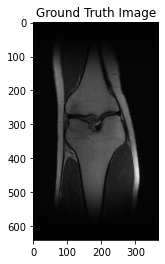

In [54]:
fig = plt.figure()
plt.title("Ground Truth Image")
plt.imshow(ground_truth_img,cmap='gray')

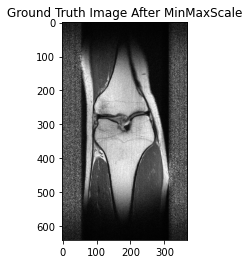

In [50]:
from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler()
img_std = min_max.fit_transform(ground_truth_img)
fig = plt.figure()
plt.title("Ground Truth Image After MinMaxScale")
plt.imshow(img_std,cmap='gray')

In [51]:
import cv2
cv2.imwrite("test_knee.jpg", ground_truth_img)


True

In [52]:
plt.imsave("test_knee_plt.jpg", ground_truth_img, cmap="gray")


In [55]:
test_file = "/Users/xiaoqingliu/Documents/COSC6364_ANA/Project/singlecoil_val/file1002377.h5"
test_file.lower()

'/users/xiaoqingliu/documents/cosc6364_ana/project/singlecoil_val/file1002377.h5'

In [74]:
re.findall(r"/Users/xiaoqingliu/Documents/COSC6364_ANA/Project/singlecoil_val/(.+?).h5", test_file)[0]
# import os
# print(os.path.splitext(os.path.basename(test_file.lower()))[0])
# re.search('(?<=/singlecoil_val/)[a-z0-9].+(?=.h5)$', test_file).group()

'file1002377'

In [78]:
file_name = re.findall(r"/Users/xiaoqingliu/Documents/COSC6364_ANA/Project/singlecoil_val/(.+?).h5", test_file)[0]
i_slice = 0
file_name = file_name + "_slice" + str(i_slice) +".jpg"

print(file_name)

file1002377_slice0.jpg


In [79]:
file_path = ground_truth + "/" + file_name
print(file_path)

/Users/xiaoqingliu/Documents/COSC6364_ANA/Project/singlecoil_groundtruth/file1002377_slice0.jpg


In [82]:
plt.imsave(file_path, ground_truth_img, cmap="gray")

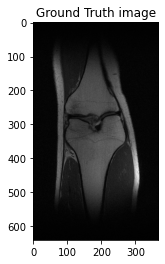

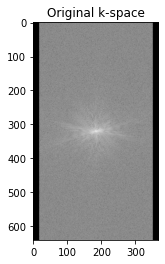

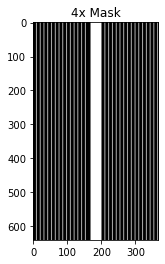

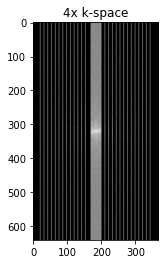

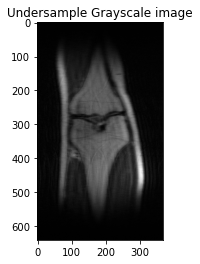

In [92]:
plt.figure()
plt.title("Ground Truth image")
plt.imshow(ground_truth_img, cmap="gray")

plt.figure()
plt.title("Original k-space")
plt.imshow(np.log(np.abs(slice_kspace) + 1e-9), cmap='gray')

# create the downsamle mask
h, w = ground_truth_img.shape
mask = generate_mask(w, h)
# get the 4x downsample k-space
filt_fft = slice_kspace * mask
plt.figure()
plt.title("4x Mask")
plt.imshow(mask, cmap='gray')

plt.figure()
plt.title("4x k-space")
plt.imshow(np.log(np.abs(filt_fft) + 1e-9), cmap='gray')


# get the gray scale downsample image
slice_real_4x = np.abs(fftshift(ifft2(filt_fft)))
fig = plt.figure()
plt.title("Undersample Grayscale image")
plt.imshow(slice_real_4x,cmap='gray')

In [97]:
file_name = re.findall(r"/Users/xiaoqingliu/Documents/COSC6364_ANA/Project/singlecoil_val/(.+?).h5", test_file)[0]
print(file_name)

file_name_4x = file_name + "_slice" + str(i_slice) +".jpg"
file_path_4x = downsample_4x + "/" + file_name_4x
print(file_path_4x)
plt.imsave(file_path_4x, slice_real_4x, cmap="gray")


file1002377
/Users/xiaoqingliu/Documents/COSC6364_ANA/Project/singlecoil_4xdownsample/file1002377_slice0.jpg


In [114]:
hf.close()

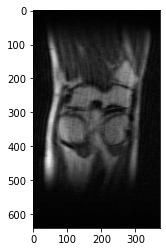

In [116]:
img_slice = cv2.imread('/Users/xiaoqingliu/Documents/COSC6364_ANA/Project/singlecoil_4xdownsample/file1000031_slice30.jpg')
plt.imshow(img_slice, cmap="gray")

In [129]:
def is_jpg(file_name):
    f = file_name.lower()
    return f.endswith(".jpg") 
    
source_path = "/Users/xiaoqingliu/Documents/COSC6364_ANA/Project/singlecoil_4xdownsample"
dst_path = "/Users/xiaoqingliu/Documents/COSC6364_ANA/Project/singlecoil_groundtruth"
source_files = []
dst_files = []


for path in os.listdir(source_path):
    if is_jpg(path):
        source_files += [os.path.join(source_path, path)]
        dst_files +=  [os.path.join(dst_path, path)]
print(len(source_files))


7135


In [132]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(source_files,
                                                    dst_files,
                                                    test_size=0.2,
                                                    random_state=1)

In [133]:
7135*0.8


5708.0

In [135]:
X_train[10]

'/Users/xiaoqingliu/Documents/COSC6364_ANA/Project/singlecoil_4xdownsample/file1000758_slice9.jpg'

In [136]:
y_train[10]

'/Users/xiaoqingliu/Documents/COSC6364_ANA/Project/singlecoil_groundtruth/file1000758_slice9.jpg'

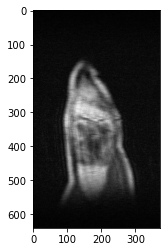

In [139]:
img = cv2.imread("/Users/xiaoqingliu/Documents/COSC6364_ANA/Project/singlecoil_4xdownsample/file1000758_slice9.jpg")
plt.imshow(img)

In [146]:
image_f = img / 255.0
print(np.max(image_f))

0.996078431372549


In [147]:
file_get_name = "/Users/xiaoqingliu/Documents/COSC6364_ANA/Project/singlecoil_4xdownsample/file1000758_slice9.jpg"

In [148]:
path, file_name_get = os.path.split(file_get_name)
print(path)
print(file_name_get)

/Users/xiaoqingliu/Documents/COSC6364_ANA/Project/singlecoil_4xdownsample
file1000758_slice9.jpg
